In [1]:
import pandas as pd
sf = pd.read_csv('Hourly_Rental_Bikes.csv')
sf.head()

,instant,date,season,year,month,hour,holiday,day_of_week,working_day,weathersit,real_temp,feeling_temp,humidity,wind_speed,hourly_users_count
0,1,01/01/2011,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,16
1,2,01/01/2011,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,40
2,3,01/01/2011,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,32
3,4,01/01/2011,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,13
4,5,01/01/2011,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,1


In [2]:
sf.drop(sf.columns[[0, 1]], axis=1, inplace=True)

In [3]:
sf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 13 columns):
season                17379 non-null int64
year                  17379 non-null int64
month                 17379 non-null int64
hour                  17379 non-null int64
holiday               17379 non-null int64
day_of_week           17379 non-null int64
working_day           17379 non-null int64
weathersit            17379 non-null int64
real_temp             17379 non-null float64
feeling_temp          17379 non-null float64
humidity              17379 non-null float64
wind_speed            17379 non-null float64
hourly_users_count    17379 non-null int64
dtypes: float64(4), int64(9)
memory usage: 1.7 MB


In [4]:
sf.describe()

,season,year,month,hour,holiday,day_of_week,working_day,weathersit,real_temp,feeling_temp,humidity,wind_speed,hourly_users_count
count,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,189.463088
std,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,181.387599
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,40.000000
50%,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,142.000000
75%,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,281.000000
max,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,977.000000


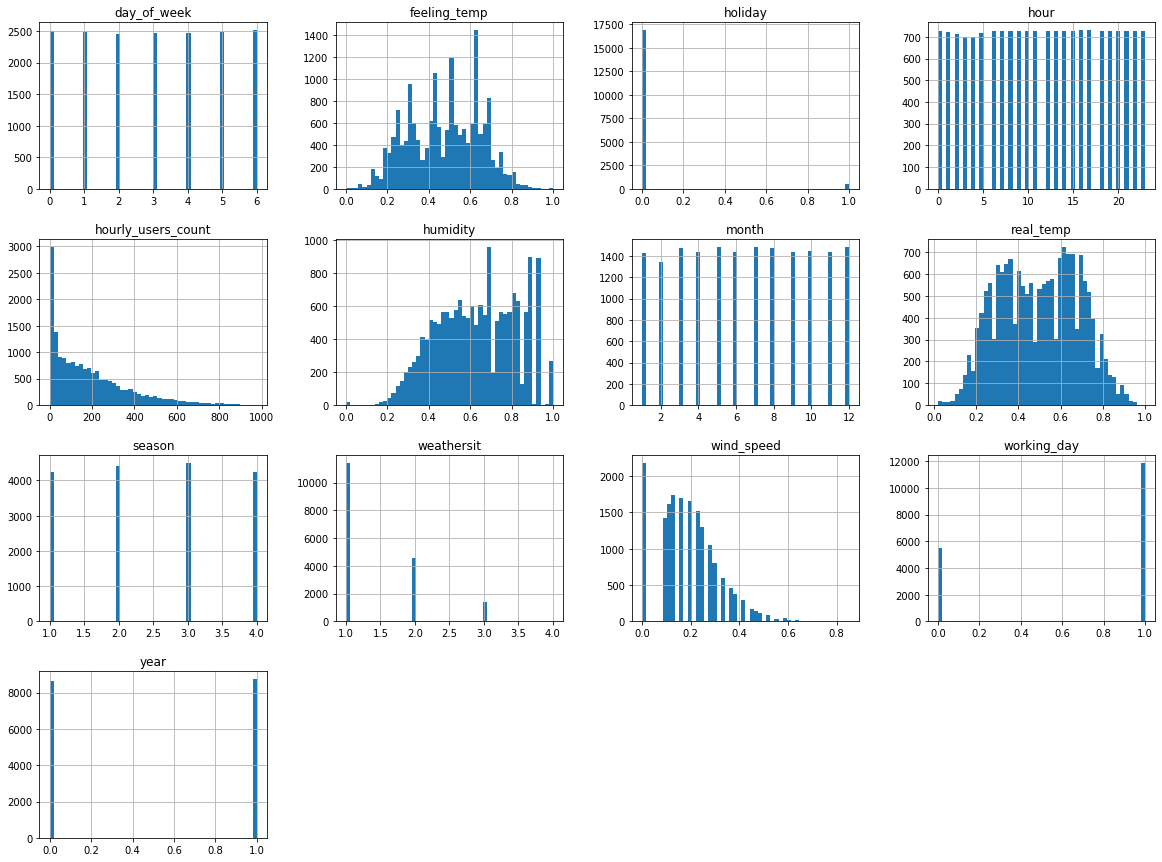

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
sf.hist(bins=50, figsize=(20,15))
plt.savefig("attribute_histogram_plots")
plt.show()

Observations: 

1. These variables have very different scales. We will discuss this later in this chapter when we explore feature scaling.

2. Many histograms are right skewed: they extend much farther to the right of the median than to the left. This may make it a bit harder for some Machine Learning algorithms to detect patterns. We will try transforming these attributes later on to have more bell-shaped distributions.

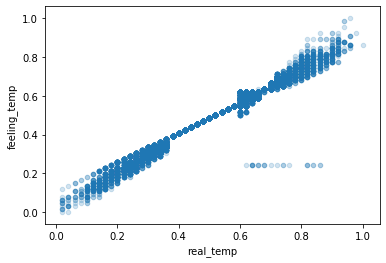

In [6]:
sf.plot(kind="scatter", x="real_temp", y="feeling_temp", alpha=0.2)
plt.savefig('map1.png')

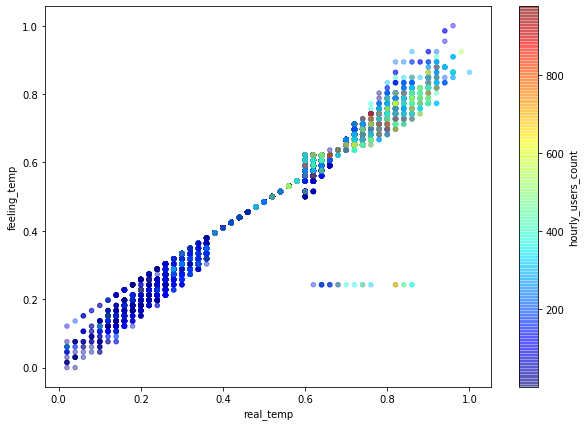

In [7]:
sf.plot(kind="scatter", x="real_temp", y="feeling_temp", alpha=0.4, figsize=(10,7),
    c="hourly_users_count", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)
plt.savefig('map2.png')

Now let’s look at how much each independent variable correlates with the hourly_users_count.

In [8]:
corr_matrix = sf.corr()
corr_matrix["hourly_users_count"].sort_values(ascending=False)

hourly_users_count    1.000000
real_temp             0.404772
feeling_temp          0.400929
hour                  0.394071
year                  0.250495
season                0.178056
month                 0.120638
wind_speed            0.093234
working_day           0.030284
day_of_week           0.026900
holiday              -0.030927
weathersit           -0.142426
humidity             -0.322911
Name: hourly_users_count, dtype: float64

The hourly_users_count tends to go up when the real_temp and feeling_temp go up. You can see a small negative correlation between the humidity and the hourly_users_count. Finally, coefficients close to zero mean that there is no linear correlation.

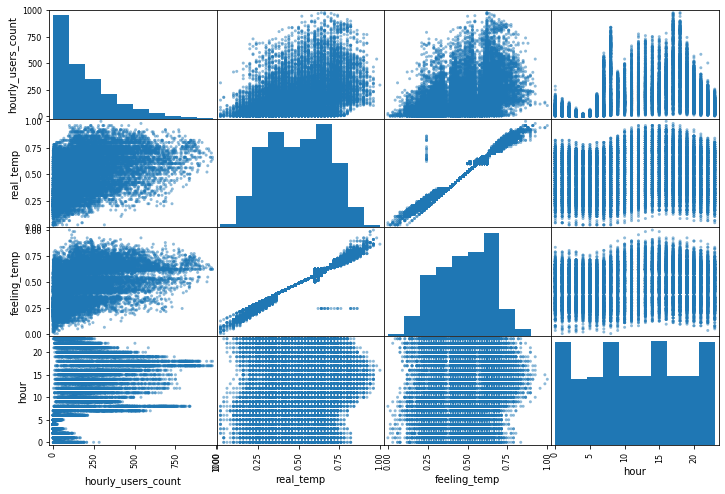

In [9]:
from pandas.plotting import scatter_matrix

attributes = ["hourly_users_count", "real_temp", "feeling_temp", "hour"]
scatter_matrix(sf[attributes], figsize=(12, 8))
plt.savefig('matrix.png')

The most promising variable to predict the hourly_users_count is the real_temp, so let’s zoom in on their correlation scatterplot

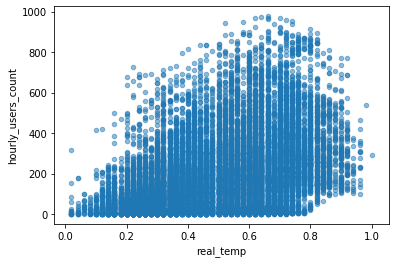

In [10]:
sf.plot(kind="scatter", x="real_temp", y="hourly_users_count", alpha=0.5)
plt.savefig('scatter.png')

First, the correlation is indeed very strong; you can clearly see the upward trend and the points are not too dispersed.

In [11]:
sf.head()

,season,year,month,hour,holiday,day_of_week,working_day,weathersit,real_temp,feeling_temp,humidity,wind_speed,hourly_users_count
0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,16
1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,40
2,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,32
3,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,13
4,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,1


In [12]:
sf.columns

Index(['season', 'year', 'month', 'hour', 'holiday', 'day_of_week',
       'working_day', 'weathersit', 'real_temp', 'feeling_temp', 'humidity',
       'wind_speed', 'hourly_users_count'],
      dtype='object')

In [13]:
sf = sf[['season', 'year', 'month', 'hour', 'holiday', 'day_of_week',
       'working_day', 'weathersit', 'real_temp', 'feeling_temp', 'humidity',
       'wind_speed', 'hourly_users_count']]
sf.head()

,season,year,month,hour,holiday,day_of_week,working_day,weathersit,real_temp,feeling_temp,humidity,wind_speed,hourly_users_count
0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,16
1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,40
2,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,32
3,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,13
4,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,1


Create dummy variables for two categorical variables.

In [14]:
X = sf[['season', 'year', 'month', 'hour', 'holiday', 'day_of_week',
       'working_day', 'weathersit', 'real_temp', 'feeling_temp', 'humidity',
       'wind_speed']]
Y = sf['hourly_users_count']

In [15]:
sf.drop(['hourly_users_count'], axis=1, inplace=True)

In [16]:
#create dummy variables
cat_vars=['season','year','month','hour','day_of_week', 'working_day', 'weathersit']
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(sf[var], prefix=var)
    sf1=sf.join(cat_list)
    sf=sf1
cat_vars=['season','year','month','hour','day_of_week', 'working_day', 'weathersit']
sf_vars=sf.columns.values.tolist()
to_keep=[i for i in sf_vars if i not in cat_vars]

In [17]:
X=sf[to_keep]
X.columns.values

array(['holiday', 'real_temp', 'feeling_temp', 'humidity', 'wind_speed',
       'season_1', 'season_2', 'season_3', 'season_4', 'year_0', 'year_1',
       'month_1', 'month_2', 'month_3', 'month_4', 'month_5', 'month_6',
       'month_7', 'month_8', 'month_9', 'month_10', 'month_11',
       'month_12', 'hour_0', 'hour_1', 'hour_2', 'hour_3', 'hour_4',
       'hour_5', 'hour_6', 'hour_7', 'hour_8', 'hour_9', 'hour_10',
       'hour_11', 'hour_12', 'hour_13', 'hour_14', 'hour_15', 'hour_16',
       'hour_17', 'hour_18', 'hour_19', 'hour_20', 'hour_21', 'hour_22',
       'hour_23', 'day_of_week_0', 'day_of_week_1', 'day_of_week_2',
       'day_of_week_3', 'day_of_week_4', 'day_of_week_5', 'day_of_week_6',
       'working_day_0', 'working_day_1', 'weathersit_1', 'weathersit_2',
       'weathersit_3', 'weathersit_4'], dtype=object)

In [18]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 60 columns):
holiday          17379 non-null int64
real_temp        17379 non-null float64
feeling_temp     17379 non-null float64
humidity         17379 non-null float64
wind_speed       17379 non-null float64
season_1         17379 non-null uint8
season_2         17379 non-null uint8
season_3         17379 non-null uint8
season_4         17379 non-null uint8
year_0           17379 non-null uint8
year_1           17379 non-null uint8
month_1          17379 non-null uint8
month_2          17379 non-null uint8
month_3          17379 non-null uint8
month_4          17379 non-null uint8
month_5          17379 non-null uint8
month_6          17379 non-null uint8
month_7          17379 non-null uint8
month_8          17379 non-null uint8
month_9          17379 non-null uint8
month_10         17379 non-null uint8
month_11         17379 non-null uint8
month_12         17379 non-null uint8
hour_0   

In [19]:
X.shape

(17379, 60)

In [20]:
Y.shape

(17379,)

Standardization of the data

In [21]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

In [23]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Done! We now have a working Linear Regression model.

In [24]:
y_pred = regressor.predict(X_test)
print('Liner Regression R squared: %.4f' % regressor.score(X_test, y_test))

Liner Regression R squared: 0.6804


So, in our model, 68.04% of the variability in Y can be explained using X. It is not so exciting.

Calculate root-mean-square error (RMSE)

In [25]:
import numpy as np
from sklearn.metrics import mean_squared_error
lin_mse = mean_squared_error(y_pred, y_test)
lin_rmse = np.sqrt(lin_mse)
print('Liner Regression RMSE: %.4f' % lin_rmse)

Liner Regression RMSE: 102.7649


Our model was able to predict the count of every hour in the test set within 102.7649 of the real count.

Calculate mean absolute error (MAE)

In [26]:
from sklearn.metrics import mean_absolute_error

lin_mae = mean_absolute_error(y_pred, y_test)
print('Liner Regression MAE: %.4f' % lin_mae)

Liner Regression MAE: 76.5095


let’s try a more complex model to see whether results can be improved - the RandomForestRegressor

In [27]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(random_state=42)
forest_reg.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [28]:
print('Random Forest R squared": %.4f' % forest_reg.score(X_test, y_test))

Random Forest R squared": 0.9188


In [29]:
y_pred = forest_reg.predict(X_test)
forest_mse = mean_squared_error(y_pred, y_test)
forest_rmse = np.sqrt(forest_mse)
print('Random Forest RMSE: %.4f' % forest_rmse)

Random Forest RMSE: 51.7989


Much better! Let's try one more.

In [30]:
from sklearn import ensemble
from sklearn.ensemble import GradientBoostingRegressor
model = ensemble.GradientBoostingRegressor()
model.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [31]:
print('Gradient Boosting R squared": %.4f' % model.score(X_test, y_test))

Gradient Boosting R squared": 0.7902


In [32]:
y_pred = model.predict(X_test)
model_mse = mean_squared_error(y_pred, y_test)
model_rmse = np.sqrt(model_mse)
print('Gradient Boosting RMSE: %.4f' % model_rmse)

Gradient Boosting RMSE: 83.2550


I would consider the RandomForestRegressor as our final model, let's print out feature importance

In [33]:
feature_labels = np.array(['holiday', 'real_temp', 'feeling_temp', 'humidity', 'wind_speed',
       'season_1', 'season_2', 'season_3', 'season_4', 'year_0', 'year_1',
       'month_1', 'month_2', 'month_3', 'month_4', 'month_5', 'month_6',
       'month_7', 'month_8', 'month_9', 'month_10', 'month_11',
       'month_12', 'hour_0', 'hour_1', 'hour_2', 'hour_3', 'hour_4',
       'hour_5', 'hour_6', 'hour_7', 'hour_8', 'hour_9', 'hour_10',
       'hour_11', 'hour_12', 'hour_13', 'hour_14', 'hour_15', 'hour_16',
       'hour_17', 'hour_18', 'hour_19', 'hour_20', 'hour_21', 'hour_22',
       'hour_23', 'day_of_week_0', 'day_of_week_1', 'day_of_week_2',
       'day_of_week_3', 'day_of_week_4', 'day_of_week_5', 'day_of_week_6',
       'working_day_0', 'working_day_1', 'weathersit_1', 'weathersit_2',
       'weathersit_3', 'weathersit_4'])
importance = model.feature_importances_
feature_indexes_by_importance = importance.argsort()[::-1]
for index in feature_indexes_by_importance:
    print('{}-{:.2f}%'.format(feature_labels[index], (importance[index] *100.0)))

feeling_temp-12.38%
hour_17-9.90%
real_temp-8.49%
humidity-8.38%
hour_18-8.27%
hour_8-7.27%
year_0-5.83%
working_day_1-4.22%
working_day_0-3.63%
hour_4-3.46%
hour_3-3.36%
hour_2-3.08%
hour_5-3.05%
year_1-2.98%
hour_1-2.74%
hour_0-2.30%
hour_19-2.14%
season_1-1.65%
hour_16-1.41%
hour_23-1.24%
hour_6-0.95%
season_4-0.89%
weathersit_3-0.71%
hour_22-0.41%
hour_7-0.35%
day_of_week_6-0.13%
hour_12-0.13%
hour_13-0.12%
hour_9-0.11%
month_10-0.11%
month_9-0.10%
hour_14-0.09%
month_8-0.03%
holiday-0.03%
hour_10-0.02%
day_of_week_0-0.02%
wind_speed-0.01%
month_5-0.01%
day_of_week_5-0.01%
day_of_week_4-0.00%
month_1-0.00%
weathersit_2-0.00%
weathersit_1-0.00%
season_2-0.00%
season_3-0.00%
day_of_week_3-0.00%
day_of_week_2-0.00%
day_of_week_1-0.00%
month_2-0.00%
hour_11-0.00%
month_3-0.00%
month_4-0.00%
month_6-0.00%
month_7-0.00%
hour_21-0.00%
hour_20-0.00%
month_11-0.00%
month_12-0.00%
hour_15-0.00%
weathersit_4-0.00%
